## Projeto 1 - 

In [1]:
# !pip install --upgrade pip

In [2]:
# !pip install pandas
# # !pip install csv
# !pip install git+https://github.com/hashiprobr/netpixi.git
# !pip install graph-tool-extras

In [3]:
# import graph_tool_extras as gte
import pandas as pd
import csv
import netpixi
import numpy as np

import graph_tool_extras as gte
from graph_tool import draw

In [4]:
df = pd.read_csv('csv/imdb_movies.csv')
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [5]:
df['date_x'] = df['date_x'].str.strip().replace('', pd.NA)
df = df.dropna(subset=['date_x'])
df['date_x'] = pd.to_datetime(df['date_x'], format='%m/%d/%Y', errors='coerce')

In [6]:
df.dtypes

names                 object
date_x        datetime64[ns]
score                float64
genre                 object
overview              object
crew                  object
orig_title            object
status                object
orig_lang             object
budget_x             float64
revenue              float64
country               object
dtype: object

In [7]:
# df_filtered = df[df['date_x'].dt.year > 2020]
df_recente = pd.DataFrame()

# Pega linhas com ano DEPOIS de 2020 e nota MAIOR ou IGUAl a 70.0
for idx, row in df.iterrows():
    ano = row['date_x'].year
    score = row['score']
    # print(score > 70)
    if ano >= 2020 and score > 70.0:
        # print('   Entrou mesmo assim')
        df_recente = pd.concat([df_recente, row.to_frame().T], ignore_index=True)

# Apaga as linhas com valores NaN
df_recente.dropna(subset='names')
df_recente.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,2023-03-02 00:00:00,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,271616668.0,AU
1,Avatar: The Way of Water,2022-12-15 00:00:00,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2316794914.0,AU
2,The Super Mario Bros. Movie,2023-04-05 00:00:00,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,724459031.0,AU
3,John Wick: Chapter 4,2023-03-23 00:00:00,80.0,"Action, Thriller, Crime","With the price on his head ever increasing, Jo...","Keanu Reeves, John Wick, Donnie Yen, Caine, Bi...",John Wick: Chapter 4,Released,English,100000000.0,351349364.0,AU
4,Puss in Boots: The Last Wish,2022-12-26 00:00:00,83.0,"Animation, Family, Fantasy, Adventure, Comedy",Puss in Boots discovers that his passion for a...,"Antonio Banderas, Puss in Boots (voice), Salma...",Puss in Boots: The Last Wish,Released,English,90000000.0,483480577.0,AU


In [8]:
df_recente.head()

# Deleta duplicados (GRRRRRR)
df_recente.drop_duplicates(subset=['names'])

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,2023-03-02 00:00:00,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,271616668.0,AU
1,Avatar: The Way of Water,2022-12-15 00:00:00,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2316794914.0,AU
2,The Super Mario Bros. Movie,2023-04-05 00:00:00,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,724459031.0,AU
3,John Wick: Chapter 4,2023-03-23 00:00:00,80.0,"Action, Thriller, Crime","With the price on his head ever increasing, Jo...","Keanu Reeves, John Wick, Donnie Yen, Caine, Bi...",John Wick: Chapter 4,Released,English,100000000.0,351349364.0,AU
4,Puss in Boots: The Last Wish,2022-12-26 00:00:00,83.0,"Animation, Family, Fantasy, Adventure, Comedy",Puss in Boots discovers that his passion for a...,"Antonio Banderas, Puss in Boots (voice), Salma...",Puss in Boots: The Last Wish,Released,English,90000000.0,483480577.0,AU
...,...,...,...,...,...,...,...,...,...,...,...,...
688,Flee,2022-02-17 00:00:00,78.0,"Documentary, Animation",Recounted mostly through animation to tell a g...,"Amin Nawabi, Self (voice), Daniel Karimyar, Am...",Flugt,Released,Danish,3400000.0,440544.0,AU
689,The Secret to Be Told: Relationship With My Aunt,2020-07-06 00:00:00,73.0,"Drama, Romance",Minwoo falls in love with an aunt younger than...,"Yoo Jung, , Ahn So-hee, , James, , Kang Min-woo,",말할 수 없는 비밀 : 이모와의 관계,Released,Korean,58000000.0,626713614.8,KR
690,Dragons: Rescue Riders: Secrets of the Songwing,2020-07-24 00:00:00,78.0,"Animation, Family, TV Movie",When a musical dragon with a beautiful voice h...,"Noah Kaye Bentley, Burple (voice), Brennley Br...",Dragons: Rescue Riders: Secrets of the Songwing,Released,English,62000000.0,183866850.0,US
691,K.G.F: Chapter 2,2022-04-14 00:00:00,76.0,"Action, Crime, Drama",The blood-soaked land of Kolar Gold Fields (KG...,"Yash, Raja Krishnappa Bairya 'Rocky', Sanjay D...",ಕೆ.ಜಿ.ಎಫ್: Chapter 2,Released,Kannada,13000000.0,90410749.0,IN


In [9]:
df_recente.drop_duplicates(subset='names', inplace=True)
print(df_recente[df_recente.duplicated(subset='names', keep=False)])

Empty DataFrame
Columns: [names, date_x, score, genre, overview, crew, orig_title, status, orig_lang, budget_x, revenue, country]
Index: []


## Criando o Grafo

In [10]:
# Peguei essa logica da Aula 3, qualquer coisa da uma olhada
g = gte.Graph(directed=False) # igual a gte.Graph(), pois directed é falso por padrão

g.add_vp('color')

In [11]:
filmes = []
for nome in df_recente['names']:
    f = g.add_vertex_by_id(nome)
    f['color'] = 0xfffff0
    filmes.append(f)

In [12]:
# pos = gte.layout_bipartite(g, v_tipo)

# graph_draw(g, pos=pos, vertex_text=v_tipo, output_size=(400, 400), output="rede_bipartida.png")

In [13]:
# Criando o vertice de generos. Antes de fazer isso temos q separar os generos de cada filme, por exemplo: em um filme q tenha Drama, Action como generos, 
# temos q criar uma lista com os dois separados
generos = set()
genero = []
for genre in df_recente['genre']:
    w = g.vertex_by_id(genre)
    # print([genre])
    for ga in genre.split(','):
        g_limpo = ga.strip()
        genero.append(g_limpo)
    generos.update(genero)

lista_generos = sorted(list(generos))

mat_zerada = np.zeros((len(lista_generos), len(lista_generos)))
matriz_gen = pd.DataFrame(mat_zerada, columns=lista_generos, index=lista_generos)

In [14]:
from pprint import pprint

In [15]:
# Cria dicionario para salvar ocorrencias
conexoes_gen = {}
for g_prim in generos:
    conexoes_gen[g_prim] = { 'Total' : 0}
    for g_sec in generos:
        if g_sec != g_prim:
            conexoes_gen[g_prim][g_sec] = 0
            # print('Criou')
# pprint(conexoes_gen)
# Ocorrencias de apararecer juntas
for genres in df_recente['genre']:
    for ga in genres.split(','):
        ga = ga.strip()
        # print(f'GA: {ga}')
        for gb in genres.split(','):
            gb = gb.strip()
            if ga != gb:
                # print(f'    GB: {gb}')
                conexoes_gen[ga][gb] += 1
                conexoes_gen[ga]['Total'] += 1

# pprint(conexoes_gen)
percents = {}
percents_mean = {}
# Porcentagem de aparição de cada filme em relação a outro
for genA in conexoes_gen:
    # r_genA = repr(genA)[1:-1]
    # print(f'GA: {genA}')
    # print(f'raw GA: {r_genA}')
    percents[genA] = {}
    mean_p = 0
    for genB in conexoes_gen[genA]:
        # r_genB = repr(genB)[1:-1]
        # print(f'    GB: {genB}')
        # print(f'    raw GB: {r_genB}')
        if genB != 'Total':
            percents[genA][genB] = round(conexoes_gen[genA][genB] * 100 / conexoes_gen[genA]['Total'], 2)
            mean_p += round(conexoes_gen[genA][genB] * 100 / conexoes_gen[genA]['Total'], 2)
    mean_p /= (len(conexoes_gen[genA]) - 1)
    percents_mean[genA] = mean_p
    
# pprint(percents)

# Media de 5.55%, aumentamos para 10% para realizar um corte maior para evitar produções incomuns
print('Media [%] por categoria: ')
pprint(percents_mean)

len(percents)

Media [%] por categoria: 
{'Action': 5.555555555555555,
 'Adventure': 5.554444444444442,
 'Animation': 5.556111111111111,
 'Comedy': 5.555555555555556,
 'Crime': 5.5566666666666675,
 'Documentary': 5.555,
 'Drama': 5.555555555555556,
 'Family': 5.554999999999999,
 'Fantasy': 5.555555555555555,
 'History': 5.55611111111111,
 'Horror': 5.555,
 'Music': 5.555555555555555,
 'Mystery': 5.554999999999999,
 'Romance': 5.557222222222222,
 'Science Fiction': 5.555000000000001,
 'TV Movie': 5.555555555555555,
 'Thriller': 5.553888888888888,
 'War': 5.556111111111111,
 'Western': 5.5572222222222205}


19

In [16]:
import matplotlib.pyplot as plt

In [17]:
# plt.plot(conexoes_gen['Action'])

In [18]:
# Popular os dados de generos
for gen in df_recente['genre']:
    # print(gen)
    for ga in gen.split(','):
        # print(ga)
        ga_limpo = ga.strip()
        for gb in gen.split(','):
            gb_limpo = gb.strip()
            matriz_gen.loc[gb_limpo, ga_limpo] = 1

display(matriz_gen)

for gen_a in lista_generos:
    for gen_b in lista_generos:
        if gen_b != gen_a and matriz_gen.loc[gen_b, gen_a] == 1:
            # Adiciona a arresta se foram localizados juntos
            # print(f'Para {gen_a} e {gen_b}, achamos relacao!')
            if g.vertex_by_id(gen_a) is None:
                v = g.add_vertex_by_id(gen_a)
                v['color'] = 0xff0000
                # v_color[v] = "red"
                
            if g.vertex_by_id(gen_b) is None:
                v = g.add_vertex_by_id(gen_b)
                v['color'] = 0xff0000
                # v_color[v] = "red"
                
            g.add_edge_by_ids(gen_a, gen_b)

            # Para nao repetir criacao de aresta
            matriz_gen.loc[gen_b, gen_a] = 0
            matriz_gen.loc[gen_a, gen_b] = 0

            df.sum(axis=1, numeric_only=True)



,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
Action,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Adventure,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
Animation,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Comedy,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
Crime,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
Documentary,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
Drama,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Family,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
Fantasy,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
History,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0


In [48]:
genero = []
generos_degree = {}

for idx, row in df_recente.iterrows():
    filme = row['names']
    revenue = row['revenue']
    for ga in row['genre'].split(','):
        g_limpo = ga.strip()
        if g_limpo not in generos_degree:
            generos_degree[g_limpo] = { 'degree': 0,  'revenue': 0}
        generos_degree[g_limpo]['degree'] += 1
        generos_degree[g_limpo]['revenue'] += revenue
        genero.append(g_limpo)
        g.add_edge_by_ids(filme, g_limpo)

In [20]:
layout = draw.sfdp_layout(g)

gte.move(g, layout)

In [21]:
print("Número de vértices:", g.num_vertices())
print("Número de arestas:", g.num_edges())

Número de vértices: 707
Número de arestas: 1880


In [22]:
gte.save(g, 'imdb.net.gz')

r = netpixi.render('imdb.net.gz');
# r.vertex_scale('genre', 1, 5)

In [23]:
r.vertex_default(
    size=20,         # tamanho            (padrão: 16)
    color=0xff0000,  # cor                (padrão: 0xffffff)
    bwidth=2,        # espessura da borda (padrão: 2)
    bcolor=0x000000, # cor da borda       (padrão: 0x3f3f3f)
)

r.edge_default(
    width=2,        # espessura         (padrão: 2)
    color=0x7777ff, # cor               (padrão: 0xffffff)
    curve1=0,       # curvatura inicial (padrão: 0)
    curve2=0,       # curvatura final   (padrão: 0)nalogamente, para atribuir características visuais às arestas, podemos chamanalogamente, para atribuir características visuais às arestas, podemos chama
)


## Degree (Híbrida)

In [24]:
g_deg_hibrid = g

c = gte.total_degree(g_deg_hibrid)
g_deg_hibrid.add_vp('degree', c)
gte.save(g_deg_hibrid, 'degree_hib.net.gz')

In [32]:
# r_hib = netpixi.render('degree_hib.net.gz')

In [26]:
r_hib.vertex_scale('degree', 10, 35)

r_hib.vertex_default(
    size=20,         # tamanho            (padrão: 16)
    color=0xff0000,  # cor                (padrão: 0xffffff)
    bwidth=2,        # espessura da borda (padrão: 2)
    bcolor=0x000000, # cor da borda       (padrão: 0x3f3f3f)
)

r_hib.edge_default(
    width=2,        # espessura         (padrão: 2)
    color=0x7777ff, # cor               (padrão: 0xffffff)
    curve1=0,       # curvatura inicial (padrão: 0)
    curve2=0,       # curvatura final   (padrão: 0)nalogamente, para atribuir características visuais às arestas, podemos chamanalogamente, para atribuir características visuais às arestas, podemos chama
)

In [27]:
g_ego = g
c = gte.burt_constraint(g_ego)
g_ego.add_vp('burt_constraint', c)
gte.save(g_ego, 'structural_holes.net.gz')

In [33]:
# r_ego = netpixi.render('structural_holes.net.gz')

In [29]:
r_ego.vertex_scale('burt_constraint', 10, 30)

In [30]:
r_ego.vertex_default(
    size=20,         # tamanho            (padrão: 16)
    color=0xff0000,  # cor                (padrão: 0xffffff)
    bwidth=2,        # espessura da borda (padrão: 2)
    bcolor=0x000000, # cor da borda       (padrão: 0x3f3f3f)
)

r_ego.edge_default(
    width=2,        # espessura         (padrão: 2)
    color=0x7777ff, # cor               (padrão: 0xffffff)
    curve1=0,       # curvatura inicial (padrão: 0)
    curve2=0,       # curvatura final   (padrão: 0)nalogamente, para atribuir características visuais às arestas, podemos chamanalogamente, para atribuir características visuais às arestas, podemos chama
)

# Modelo Baseline - Variaveis de Controle

In [96]:
import regression as reg

# revenue ~ degree
# revenue ~ degree + restricao

genero = []
degree = []
revenue = []

for gen, v in generos_degree.items():
    genero.append(gen)
    degree.append(v['degree'])
    revenue.append(v['revenue'])

dic_aux = { 'genero': genero, 
            'degree': degree,
            'revenue': revenue
          }

df_genero_deg = pd.DataFrame(dic_aux)
df_genero_deg.head()

result = reg.linear(data=df_genero_deg, formula='revenue ~ degree')
result.micro_summary()

variable,coefficient,std error,p-value
degree,365942372.377056,18801674.198312,0.000000


In [97]:
result.summary()

/opt/miniconda/envs/jupyterlab/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=19 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     378.8
Date:                Sun, 18 May 2025   Prob (F-statistic):           4.67e-13
Time:                        20:45:09   Log-Likelihood:                -453.39
No. Observations:                  19   AIC:                             910.8
Df Residuals:                      17   BIC:                             912.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.61e+09    2.2e+09      1.186      0.252   -2.03e+09    7.25e+09
degree      3.659e+08   1.88e+07     19.463      0.000    3.26e+08    4.06e+08
==============================================================================
Omnibus:                        7.561   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                4.952
Skew:                           1.166   Prob(JB):                       0.0841
Kurtosis:                       3.902   Cond. No.                         190.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

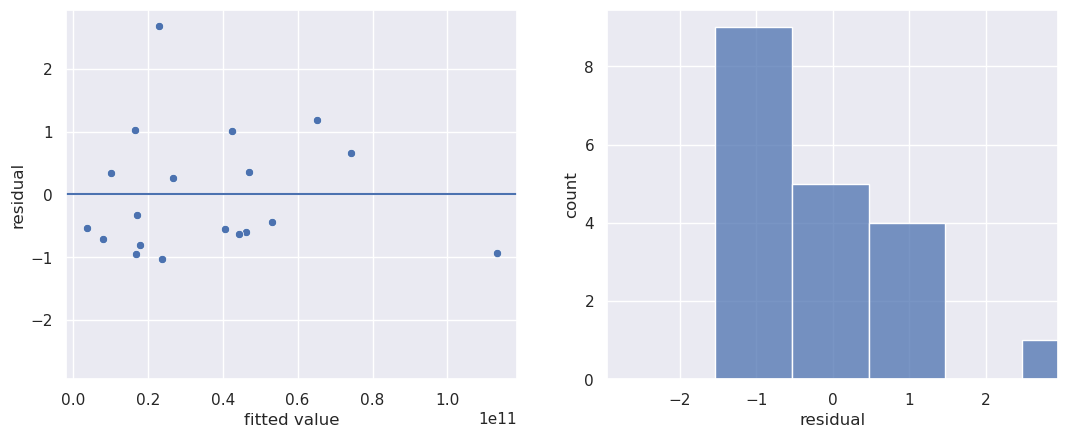

In [98]:
result.plot_residuals()

## Modelo Completo

In [99]:
generos_restricao = {}

for idx, row in df_recente.iterrows():
    lista_generos = [g.strip() for g in row['genre'].split(',')]
    num_generos_filme = len(lista_generos)

    for g in lista_generos:
        if g not in generos_restricao:
            generos_restricao[g] = []
        generos_restricao[g].append(num_generos_filme)

restricao = {g: sum(v) / len(v) for g, v in generos_restricao.items()}
# print(restricao)

restricao_l = [0 for i in range(len(genero))]
# print(restricao_l)

for ga, v in restricao.items():
    g_index = genero.index(ga) # Pega qual index o genero ta
    restricao_l[g_index] = v

dic_aux['restricao'] = restricao_l
# print(dic_aux)

df_genero_rest = pd.DataFrame(dic_aux)
df_genero_rest.head()

result = reg.linear(data=df_genero_rest, formula='revenue ~ degree + restricao')
result.micro_summary()

variable,coefficient,std error,p-value
degree,366758210.949117,17700214.717333,0.000000
restricao,-3721956886.702446,2082470356.480893,0.092849


In [100]:
result.summary()

/opt/miniconda/envs/jupyterlab/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=19 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     215.5
Date:                Sun, 18 May 2025   Prob (F-statistic):           2.70e-12
Time:                        20:46:51   Log-Likelihood:                -451.66
No. Observations:                  19   AIC:                             909.3
Df Residuals:                      16   BIC:                             912.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     1.4e+10    6.7e+09      2.089      0.053   -2.06e+08    2.82e+10
degree      3.668e+08   1.77e+07     20.721      0.000    3.29e+08    4.04e+08
restricao  -3.722e+09   2.08e+09     -1.787      0.093   -8.14e+09    6.93e+08
==============================================================================
Omnibus:                        1.048   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.592   Jarque-Bera (JB):                0.797
Skew:                           0.148   Prob(JB):                        0.671
Kurtosis:                       2.041   Cond. No.                         642.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

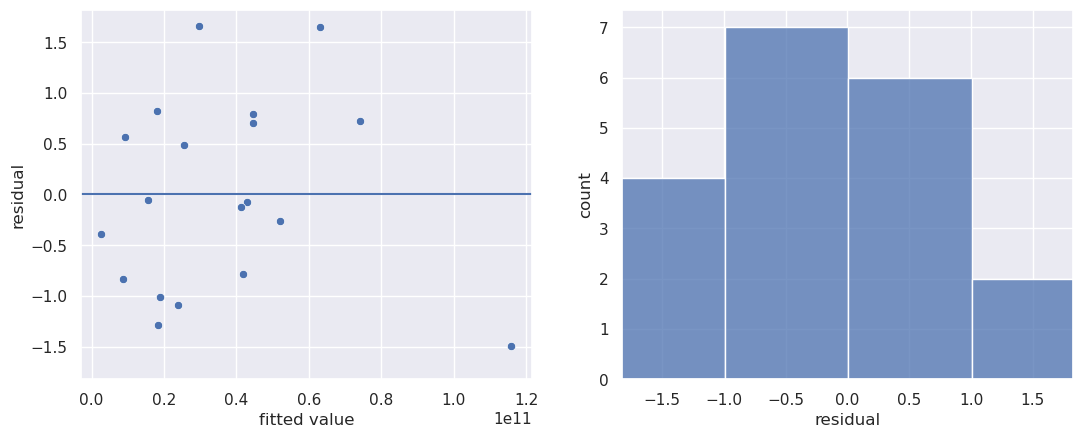

In [101]:
result.plot_residuals()